In [190]:
import pandas as pd  #import libraries
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
import statistics
    
df = pd.read_csv (r'C:\Users\tetia\Downloads\yrbss_samp.csv') #read file with data
df = df.dropna(subset = ['weight', 'height','physically_active_7d']) #clean rows that will be used in case there 
                                                                        #are missing values
df.head()  #show the top 5 rows of the datast


,age,gender,grade,hispanic,race,height,weight,helmet_12m,text_while_driving_30d,physically_active_7d,hours_tv_per_school_day,strength_training_7d,school_night_hours_sleep
0,16.0,female,11.0,not,Black or African American,1.50,52.62,never,1-2,0,4,0,8
1,17.0,male,11.0,not,White,1.78,74.84,rarely,0,7,1,5,7
2,17.0,male,11.0,not,White,1.75,106.60,never,0,7,2,0,7
3,15.0,male,10.0,hispanic,NaN,1.68,66.68,never,did not drive,3,2,1,5
4,18.0,male,12.0,not,Black or African American,1.70,80.29,never,did not drive,0,2,2,6


In [191]:
df['bmi'] = df['weight']/df['height'] ** 2 #create a new column of BMI
df['bmi'].describe() #see some descriprive stats of this new column

count    100.000000
mean      23.919156
std        4.877600
min       15.400068
25%       20.957295
50%       23.517759
75%       25.731394
max       51.920916
Name: bmi, dtype: float64

In [192]:
less_4 = df[df['physically_active_7d'] < 4] #divide the participants into 2 groups based on the num of days active
more_4 = df[df['physically_active_7d'] >= 4]

In [193]:
less_4.describe()  #see basic descriptive stats of the categoty

,age,grade,height,weight,physically_active_7d,strength_training_7d,bmi
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,16.295455,10.681818,1.688864,68.786136,1.250000,0.772727,24.160789
std,1.152945,1.094866,0.086056,17.212619,1.183707,1.236342,6.254650
min,14.000000,9.000000,1.500000,47.630000,0.000000,0.000000,15.400068
25%,16.000000,10.000000,1.630000,54.430000,0.000000,0.000000,20.387032
50%,16.000000,11.000000,1.690000,64.250000,1.000000,0.000000,23.439466
75%,17.000000,12.000000,1.750000,77.110000,2.000000,1.250000,25.917470
max,18.000000,12.000000,1.880000,124.740000,3.000000,5.000000,51.920916


In [194]:
more_4.describe()  #see basic descriptive stats of the category

,age,grade,height,weight,physically_active_7d,strength_training_7d,bmi
count,55.000000,55.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,16.054545,10.272727,1.703214,68.972500,5.714286,4.357143,23.729300
std,1.192852,1.079344,0.089992,12.339284,1.317219,2.235487,3.486419
min,14.000000,9.000000,1.520000,46.270000,4.000000,0.000000,16.566837
25%,15.000000,9.000000,1.630000,59.765000,4.000000,3.000000,21.580344
50%,16.000000,10.000000,1.700000,66.905000,6.000000,5.000000,23.582004
75%,17.000000,11.000000,1.757500,76.427500,7.000000,6.250000,25.731394
max,18.000000,12.000000,1.930000,106.600000,7.000000,7.000000,34.808163


In [229]:
def descriptive_stats(sample):  #create functino hat will calculate all desctibtive stats
    n = len(sample)  #size of the sample (number of elements which is the same as length of the list)
    mean = sum(sample)/n #sum of the elements in the sample devided by the number of elements to get an average
    mode = sample.mode() #the most popular value 
    median = sample.median() #the value in the middle
    std = statistics.stdev(sample) #standard deviation of the sample(this function calculates it with n-1 in denominator)
    rangee = max(sample) - min(sample) #difference between the sampest and largest number
    print('sample size = ',round(n,2),'\nmean = ',round(mean,2),'\nmode = ',round(mode,2),'\nmedian = ',round(median,2),'\nstandard deviation = ',round(std,2),'\nrange =',round(rangee,2))
    

print('for the sample of teenagers that are physically active for three and fewer days per week\n'), descriptive_stats(less_4['bmi'])


print('\nfor the sample of teenagers that are physically active for four and more days per week\n'), descriptive_stats(more_4['bmi'])



for the sample of teenagers that are physically active for three and fewer days per week

sample size =  44 
mean =  24.16 
mode =  0    20.49
dtype: float64 
median =  23.44 
standard deviation =  6.25 
range = 36.52

for the sample of teenagers that are physically active for four and more days per week

sample size =  56 
mean =  23.73 
mode =  0    23.62
dtype: float64 
median =  23.58 
standard deviation =  3.49 
range = 18.24


(None, None)

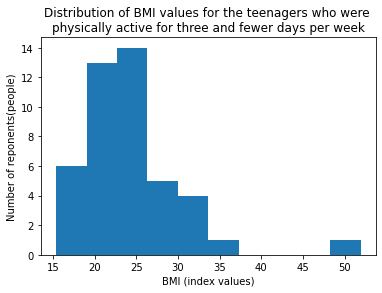

In [196]:
plt.hist(less_4['bmi']) #create histogram for the first sample
plt.title('Distribution of BMI values for the teenagers who were \nphysically active for three and fewer days per week')
plt.xlabel('BMI (index values)') #add title and labelds
plt.ylabel('Number of reponents(people)')
plt.show()



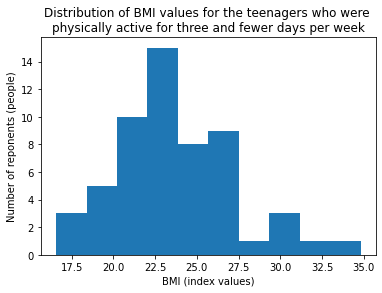

In [197]:
plt.hist(more_4['bmi']) #create histogram for the second sample
plt.title('Distribution of BMI values for the teenagers who were \nphysically active for three and fewer days per week')
plt.xlabel('BMI (index values)')  #add title and labelds
plt.ylabel('Number of reponents (people)')
plt.show()

In [198]:
def difference_of_means_test(sample1,sample2,tails): #define function
    n1 = len(sample1) #sample sizes 
    n2 = len(sample2)

    mean1 = sum(sample1)/len(sample1) #means 
    mean2 = sum(sample2)/len(sample2)

    std1 = statistics.stdev(sample1) #standart deviations of sample formula
    std2 = statistics.stdev(sample2)

    SE = np.sqrt(std1**2/n1 + std2**2/n2) #finding the standart error by formula for two means
    Tscore = np.abs((mean2 - mean1))/SE #calculate T-score by deviding the absolute difference of means by the SE    
    df = min(n1,n2)- 1 #the df is calculated by substracting 1 from the smaller sample sizes
    pvalue = tails*stats.t.cdf(-Tscore,df) #finding the T-score for the Tscore with the formula
    SDpooled = np.sqrt((std1**2*(n1-1) + std2**2*(n2-1))/(n1+n2-2)) #weighted average of standard deviations for two or more groups. The individual standard deviations are averaged, with more “weight” given to larger sample sizes
    HedgesG  = np.abs(mean2 - mean1)/SDpooled #using Hedges'g since we have different sample sizes (n)
    
    print('t-score =',Tscore)
    print('p-value =',pvalue)
    print("Hedges's G value =",HedgesG)
    print(SE)
    
difference_of_means_test(less_4['bmi'],more_4['bmi'],1) 

t-score = 0.4102614090773121
p-value = 0.3418256168636293
Hedges's G value = 0.08810134734557744
1.0517420282177468


In [203]:
 def confidence_intervals(sample):
        mean = sum(sample)/len(sample)
        q = 1 - 0.95 #define significance level by substracting confidecne interval from 1
        df = len(sample) - 1 #calculate degrees of freedom
        t_value = stats.t.ppf(q, df) #calculate the T-value
        lower_bound = mean + t_value* std1/44**0.5
        upper_bound = mean - t_value* std1/44**0.5
        confidence_inteval = [round(lower_bound,2), round(upper_bound,2)]
        return confidence_inteval
        
intervals1 = confidence_intervals(more_4['bmi'])
intervals2 = confidence_intervals(less_4['bmi'])
print('95% condidence intervals for the first sample = ',intervals1)
print('95% condidence intervals for the second sample = ',intervals2)
        
        

95% condidence intervals for the first sample =  [22.15, 25.31]
95% condidence intervals for the second sample =  [22.58, 25.75]


In [228]:
difference = abs((intervals1[0] - intervals2[0]) + (intervals1[1] - intervals2[1]) #find the sum of differences between the starting and ending points 
def percent_overlap(intervals): #define function
    interval_length = intervals[1] - intervals[0] #find interval length
    overlap = interval_length - difference #find overlap
    percent_overlap = 100 - (difference * 100 / interval_length) #find a percentage overlap
    return round(percent_overlap,1) 

                 
print('There is an overlap in the first interval of {} %'.format(percent_overlap(intervals1)))
print('There is an overlap in the second interval of {} %'.format(percent_overlap(intervals2)))


There is an overlap in the first interval of 72.5 %
There is an overlap in the second interval of 72.6 %
